In [ ]:
pip install numpy==1.26.4

In [1]:
pip install nbimporter


Note: you may need to restart the kernel to use updated packages.


In [4]:
import nbimporter
from features_create import player_statistics2, player_statistics_last

In [1]:
import pandas as pd
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 in d:\anaconda\envs\new_env\lib\site-packages (from tensorflow-intel==2.17.0->tensorflow) (0.6.0)



In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
import keras

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [3]:
#if u import data then use this cell
df_features = pd.read_csv('X_data_new.csv', delimiter = ',', index_col=0)
y = pd.read_csv('Y_data_new.csv', delimiter =',', index_col=0)

i = np.arange(len(df_features))
np.random.shuffle(i)
df_features = df_features.iloc[i]
y = y.iloc[i]

X_train, X_test, y_train, y_test = train_test_split(
    df_features, y, test_size=0.1, random_state=0)



In [8]:
params = {
   'xgb__n_estimators': [25, 50, 100, 150, 200],
   'xgb__max_depth': [3,7,10,15,20],
   'xgb__learning_rate': [0.1, 0.3, 0.8],
   'xgb__objective':['binary:logistic'],
   'xgb__subsample': [0.5, 0.7, 1],
   'xgb__colsample_bytree': [0.5, 0.7, 1],
    'xgb__reg_alpha': [0, 1, 10],
    'xgb__reg_lambda': [0, 1, 10]
    }
xgb_model = xgb.XGBClassifier()
xgb_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('xgb', xgb_model)])
grid = GridSearchCV(xgb_pipe, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

grid_result.best_params_

{'xgb__colsample_bytree': 0.5,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 20,
 'xgb__n_estimators': 100,
 'xgb__objective': 'binary:logistic',
 'xgb__reg_alpha': 0,
 'xgb__reg_lambda': 10,
 'xgb__subsample': 1}

In [51]:
grid_result.best_score_ 

0.6791012777070291

In [55]:
xgb_model.get_booster().get_score(importance_type='weight')
#shows how much every features participated in splitting a node

{'0': 2311.0,
 '1': 2607.0,
 '2': 2192.0,
 '3': 2346.0,
 '4': 2449.0,
 '5': 2084.0,
 '6': 2815.0,
 '7': 2598.0,
 '8': 2769.0,
 '9': 2674.0,
 '10': 2395.0,
 '11': 212.0,
 '12': 182.0,
 '14': 254.0,
 '15': 2479.0,
 '16': 2740.0,
 '17': 2734.0,
 '18': 1972.0,
 '19': 2134.0,
 '20': 2115.0,
 '21': 1813.0,
 '22': 1623.0,
 '23': 2749.0,
 '24': 2786.0,
 '25': 2468.0,
 '26': 716.0,
 '27': 2980.0}

In [76]:
params = {
    'rfc__n_estimators':[int(x) for x in np.linspace(start = 50, stop = 400, num = 8)],
    'rfc__criterion': ['entropy','gini'],
    'rfc__max_depth': [int(x) for x in np.linspace(start = 10, stop = 60, num = 8)],
    'rfc__min_samples_split': [int(x) for x in np.linspace(start = 5, stop = 30, num = 8)],
    'rfc__min_samples_leaf': [int(x) for x in np.linspace(start = 5, stop = 30, num = 8)],
    'rfc__bootstrap': [True],
    'rfc__max_features': ['log2', 'sqrt']
}
rfc_model = RFC()
rfc_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rfc', rfc_model)])
grid = GridSearchCV(rfc_pipe, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_result = grid.fit(X_train, y_train['0'].values)
grid_result.best_params_

{'rfc__bootstrap': True,
 'rfc__criterion': 'entropy',
 'rfc__max_depth': 52,
 'rfc__max_features': 'log2',
 'rfc__min_samples_leaf': 5,
 'rfc__min_samples_split': 5,
 'rfc__n_estimators': 350}

In [77]:
grid_result.best_score_ #accuracy

0.6717292051414389

In [18]:
params = {"logreg__C":np.logspace(-3,3,7), "logreg__penalty":["l1","l2"], 'logreg__tol': [0.00001,0.0001,0.001,0.01,0.1,1] }
logreg = LogisticRegression(solver = 'saga', max_iter = 100000, random_state = np.random.randint(1000))

logreg_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('logreg', logreg)])

grid3 = GridSearchCV(logreg_pipe, params, cv=5, n_jobs=-1, scoring='accuracy')


grid3_result = grid3.fit(X_train, y_train['0'].values)

grid3_result.best_params_

{'logreg__C': 0.01, 'logreg__penalty': 'l1', 'logreg__tol': 0.0001}

In [19]:
grid3_result.best_score_

0.6282594777424727

In [11]:
#случай с одним слоем
params={
    'shuffle': [True],
    'batch_size':[200],
    'epochs':[50],
    'model__neurons_1':[10, 28, 50],
    'model__activation1':[keras.activations.leaky_relu, 'relu','sigmoid','tanh'],
    'model__dropout':[0, 0.2,0.5],
    'model__learning_rate': [0.1,0.01,0.001],
    'model__weight_decay':[0.001, 0.0001,0.00001,0.000001]
    }

def create_model(neurons_1, activation1, dropout, learning_rate, weight_decay):
  model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(28,)),
  tf.keras.layers.Dropout(rate=dropout),
  tf.keras.layers.Dense(units = neurons_1, activation = activation1, kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=np.sqrt(1/28), seed=None), bias_initializer = tf.keras.initializers.Constant(value=0.01), kernel_regularizer=tf.keras.regularizers.L1(0.01)),
  tf.keras.layers.Dropout(rate=dropout),
  tf.keras.layers.Dense(units=2,activation='softmax', kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=np.sqrt(1/neurons_1), seed=None), bias_initializer= tf.keras.initializers.Constant(value=0.01), kernel_regularizer=tf.keras.regularizers.L1(0.01))
  ])
  model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate, weight_decay = weight_decay), #tf.keras.optimizers.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy']
            )
  return model

ann_model = KerasClassifier(model=create_model, verbose = 0) #по факту для обучения достаточно просто выполнить функцию create_model, но мы делаем эту обёртку чтобы можно было выполнять функции из scikit learn
ann_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('KerasClassifier', ann_model)])
gs = GridSearchCV(estimator=ann_model, param_grid=params,scoring='accuracy',cv=5,
                     n_jobs=1,return_train_score=True,verbose=0)
grid_result = gs.fit(X_train.values, to_categorical(y_train))

D:\anaconda\envs\new_env\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [12]:
grid_result.best_params_

{'batch_size': 200,
 'epochs': 50,
 'model__activation1': <function keras.src.activations.activations.leaky_relu(x, negative_slope=0.2)>,
 'model__dropout': 0.2,
 'model__learning_rate': 0.1,
 'model__neurons_1': 28,
 'model__weight_decay': 0.001,
 'shuffle': True}

In [13]:
grid_result.best_score_

0.6322716235635134

In [ ]:
#ANN with 2 layers
#showing worse results so it doesn't worth to make gridsearch
params={
    'shuffle': [True],
    'batch_size':[200],
    'epochs':[50],
    'model__neurons_1':[10, 28, 50],
    'model__neurons_2':[10, 28, 50],
    'model__activation1':[keras.activations.leaky_relu, 'relu','sigmoid','tanh'],
    'model__activation2':[keras.activations.leaky_relu, 'relu','sigmoid','tanh'],
    'model__dropout':[0, 0.2, 0.5],
    'model__learning_rate': [0.1, 0.001],
    'model__weight_decay':[0.0001, 0.000001]
    }

def create_model(neurons_1, neurons_2, activation1, activation2, dropout, learning_rate, weight_decay):
  model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(28,)),
  tf.keras.layers.Dropout(rate=dropout),
  tf.keras.layers.Dense(units = neurons_1, activation = activation1, kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=np.sqrt(1/28), seed=None), bias_initializer = tf.keras.initializers.Constant(value=0.01), kernel_regularizer=tf.keras.regularizers.L1(0.01)),
  tf.keras.layers.Dropout(rate=dropout),
  tf.keras.layers.Dense(units=neurons_2, activation=activation2, kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=np.sqrt(1/neurons_1), seed=None), bias_initializer = tf.keras.initializers.Constant(value=0.01), kernel_regularizer=tf.keras.regularizers.L1(0.01)),
  tf.keras.layers.Dropout(rate=dropout),
  tf.keras.layers.Dense(units=2,activation='softmax', kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=np.sqrt(1/neurons_2), seed=None), bias_initializer= tf.keras.initializers.Constant(value=0.01), kernel_regularizer=tf.keras.regularizers.L1(0.01))
  ])
  model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate, weight_decay = weight_decay), #tf.keras.optimizers.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy']
            )
  return model

ann_model = KerasClassifier(model=create_model) #по факту для обучения достаточно просто выполнить функцию create_model, но мы делаем эту обёртку чтобы можно было выполнять функции из scikit learn
ann_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('KerasClassifier', ann_model)])
gs = GridSearchCV(estimator=ann_model, param_grid=params,scoring='accuracy',cv=5,
                     n_jobs=1,return_train_score=True,verbose=1)
grid_result = gs.fit(X_train.values, to_categorical(y_train))

In [4]:
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27]])
X_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27]] = scaler.transform(X_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27]])
X_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27]] = scaler.transform(X_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27]])


In [15]:
xgb_model = xgb.XGBClassifier(
   n_estimators = 100,
   max_depth = 20,
   learning_rate = 0.1,  
   objective ='binary:logistic',
   early_stopping_rounds = 10,
   subsample = 1,
   colsample_bytree = 0.5,
   reg_alpha = 0,
   reg_lambda = 10
)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)
preds = xgb_model.predict(X_test)

In [51]:
accuracy_score(y_test, preds)  

0.6638005159071367

In [82]:
rfc_model = RFC(
    n_estimators = 350,
    criterion = 'entropy',
    max_depth = 52,
    min_samples_split = 5,
    min_samples_leaf = 5,
    bootstrap = True,
    max_features = 'log2'
)
rfc_model.fit(
    X_train, y_train
)
preds = rfc_model.predict(X_test)

D:\anaconda\envs\new_env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [83]:
accuracy_score(y_test, preds)

0.646603611349957

In [54]:
svm_model = svm.SVC(
    C = 0.27,
    kernel = 'rbf',
    verbose = True,
    max_iter = 20000,
    gamma = 0.25,
    probability = True
)
svm_model.fit(
    X_train, y_train['0'].values,
)
preds = svm_model.predict(X_test)
accuracy_score(y_test['0'].values, preds)

[LibSVM]

0.648323301805675

In [20]:
logreg_model = LogisticRegression(C = 0.01, penalty = 'l1', tol = 0.0001, solver = 'saga', max_iter = 100000, random_state = np.random.randint(1000))
logreg_model.fit(
    X_train, y_train['0'].values,
)
preds = logreg_model.predict(X_test)
accuracy_score(y_test['0'].values, preds)

0.6208082545141874

In [22]:

neurons_1 = 28
activation_1 = keras.activations.leaky_relu
ANN_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units = neurons_1, activation = keras.activations.leaky_relu, kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=np.sqrt(1/28), seed=tf.keras.random.SeedGenerator(seed=42)), bias_initializer = tf.keras.initializers.Constant(value=0.01), kernel_regularizer=tf.keras.regularizers.L1(0.001)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=2,activation='softmax', kernel_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=np.sqrt(2/neurons_1), seed=tf.keras.random.SeedGenerator(seed=42)), bias_initializer= tf.keras.initializers.Constant(value=0.01), kernel_regularizer=tf.keras.regularizers.L1(0.001))
])
ANN_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1, weight_decay = 0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy']
              )


In [23]:
ANN_model.fit(X_train.values, to_categorical(y_train), epochs=50, batch_size=200, validation_data=(X_test.values, to_categorical(y_test)), shuffle = True)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5139 - loss: 0.8812 - val_accuracy: 0.6139 - val_loss: 0.7754
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5856 - loss: 0.7993 - val_accuracy: 0.6328 - val_loss: 0.7598
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.7749 - val_accuracy: 0.6354 - val_loss: 0.7523
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6034 - loss: 0.7647 - val_accuracy: 0.6423 - val_loss: 0.7470
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6025 - loss: 0.7594 - val_accuracy: 0.6406 - val_loss: 0.7412
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6076 - loss: 0.7547 - val_accuracy: 0.6440 - val_loss: 0.7369
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6083 - loss: 0.7490 - val_accuracy: 0.6414 - val_loss: 0.7322
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6157 - loss: 0.7398 - val_accuracy: 0.6457 - val_loss

In [36]:
model.predict(X_train.values)

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.7701271 , 0.2298729 ],
       [0.35971788, 0.6402821 ],
       [0.30237567, 0.6976243 ],
       ...,
       [0.608224  , 0.39177606],
       [0.11855842, 0.8814416 ],
       [0.24817008, 0.7518299 ]], dtype=float32)

In [37]:
model.evaluate(X_test.values, to_categorical(y_test), verbose = 0) #first is loss, second is metric(accuracy)

[0.6675747036933899, 0.6079105734825134]

In [29]:
ml_data = pd.read_excel('odds.xlsx')
ml_data = ml_data.dropna(subset=['winner_rank', 'loser_rank', 'winner_rank_points', 'loser_rank_points'])

df_features = []
y = []

In [30]:
atp_matches_2024 = pd.read_csv('atp_matches_2024.csv')
atp_matches_2023 = pd.read_csv('atp_matches_2023.csv')
atp_matches_2022 = pd.read_csv('atp_matches_2022.csv')

atp_matches_qual_chall_2023 = pd.read_csv('atp_matches_qual_chall_2023.csv')
atp_matches_qual_chall_2024 = pd.read_csv('atp_matches_qual_chall_2024.csv')
atp_matches_qual_chall_2022 = pd.read_csv('atp_matches_qual_chall_2022.csv')

all_data = pd.concat([atp_matches_2024,atp_matches_2023, atp_matches_qual_chall_2024, atp_matches_qual_chall_2023, atp_matches_2022, atp_matches_qual_chall_2022], ignore_index=True)

all_data = all_data.dropna(subset=['w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_ace', 'w_ace', 'w_df', 'l_df'])

all_data['tourney_name'] = all_data['tourney_name'].apply(lambda x: 'Davis Cup' if x.startswith('Davis Cup') else x)
all_data = all_data[all_data['tourney_name']!='Davis Cup']
all_data = all_data[all_data['tourney_name']!='United Cup']
all_data = all_data[all_data['surface'].isin(['Hard','Clay','Grass'])]
all_data = all_data[all_data['best_of'] == 3]

In [31]:
#case 3
#statistics of all games + 3 last games
#for evaluating predicted odds
for ind, row in ml_data.iterrows():
  player1 = player_statistics2(all_data.loc[all_data['tourney_date'] < row['tourney_date']], row['winner_name'])
  if(player1 == 'no stat'):
    continue
  player2 = player_statistics2(all_data.loc[all_data['tourney_date'] < row['tourney_date']], row['loser_name'])
  if(player2 == 'no stat'):
    continue
  current_match = [0,0,0]
  if(row['surface'] == 'Hard'):
    current_match[-3] = 1
  elif(row['surface'] == 'Clay'):
    current_match[-2] = 1
  else:
    current_match[-1] = 1

  if(row['winner_hand'] == row['loser_hand']):
    current_match +=[1]
  else:
    current_match +=[0]

  player1_last = player_statistics_last(all_data.loc[all_data['tourney_date'] < row['tourney_date']], row['winner_name'])
  if(player1 == 'no stat'):
    continue
  player2_last = player_statistics_last(all_data.loc[all_data['tourney_date'] < row['tourney_date']], row['loser_name'])
  if(player2 == 'no stat'):
    continue

  df_features.append([a - b for a, b in zip(player1, player2)] + current_match + [row['winner_rank']-row['loser_rank']] + [row['winner_rank_points'] - row['loser_rank_points']]\
                     + [a - b for a, b in zip(player1_last, player2_last)])
  y.append(row[['winner_odds', 'loser_odds']].values)



In [32]:
df_features = pd.DataFrame(df_features)
df_features.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27]] = scaler.transform(df_features.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27]])

D:\anaconda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
predictions = ANN_model.predict(df_features)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.1771571 , 0.82284284],
       [0.9813766 , 0.01862335],
       [0.14564484, 0.85435516],
       [0.01901831, 0.9809817 ],
       [0.38687754, 0.61312246],
       [0.4902709 , 0.5097291 ],
       [0.2372235 , 0.7627765 ],
       [0.01265638, 0.98734367],
       [0.3138043 , 0.68619573],
       [0.8298115 , 0.17018841],
       [0.39632693, 0.6036731 ],
       [0.77102125, 0.22897871],
       [0.2405218 , 0.75947815],
       [0.14716764, 0.8528323 ],
       [0.5141121 , 0.48588786],
       [0.5525681 , 0.44743186],
       [0.36519492, 0.6348051 ],
       [0.43334705, 0.5666529 ],
       [0.4040639 , 0.59593606],
       [0.57046205, 0.42953798],
       [0.6157973 , 0.38420272],
       [0.5114055 , 0.48859447],
       [0.41545418, 0.58454585],
       [0.25997716, 0.74002284],
       [0.52253604, 0.47746387],
       [0.39019158, 0.6098084 ],
       [0.6479877 , 0.35201225],
       [0.45884332, 0.5411567 ],
       [0.65270776, 0.34729218],
       [0.366983  , 0.63301694],
       [0.

In [50]:
#for ANN
bet = 0
revenue = 0
for i in range(len(predictions)):
  if(1/predictions[i][0]<y[i][0]):
    bet+=1
    revenue = y[i][0]
  elif(1/predictions[i][1]<y[i][1]):
    bet+=1
revenue/bet
#ROI

0.020652173913043477

In [57]:
predictions = xgb_model.predict_proba(df_features)
predictions

array([[0.07138216, 0.92861784],
       [0.4685927 , 0.5314073 ],
       [0.10583788, 0.8941621 ],
       [0.18692571, 0.8130743 ],
       [0.39392912, 0.6060709 ],
       [0.37944812, 0.6205519 ],
       [0.1373359 , 0.8626641 ],
       [0.10798854, 0.89201146],
       [0.3870064 , 0.6129936 ],
       [0.8150186 , 0.18498139],
       [0.45516092, 0.5448391 ],
       [0.68469024, 0.3153098 ],
       [0.08998466, 0.91001534],
       [0.07195622, 0.9280438 ],
       [0.37458187, 0.6254181 ],
       [0.55401105, 0.44598895],
       [0.4505961 , 0.5494039 ],
       [0.26069504, 0.73930496],
       [0.39981782, 0.6001822 ],
       [0.5016795 , 0.49832052],
       [0.47553444, 0.52446556],
       [0.3728683 , 0.6271317 ],
       [0.19425738, 0.8057426 ],
       [0.15441972, 0.8455803 ],
       [0.4637249 , 0.5362751 ],
       [0.3480022 , 0.6519978 ],
       [0.37113732, 0.6288627 ],
       [0.53517723, 0.46482277],
       [0.43965876, 0.56034124],
       [0.2197665 , 0.7802335 ],
       [0.

In [58]:
#for xgb
bet = 0
revenue = 0
for i in range(len(predictions)):
  if(1/predictions[i][0]<y[i][0]):
    bet+=1
    revenue = y[i][0]
  elif(1/predictions[i][1]<y[i][1]):
    bet+=1
revenue/bet
#ROI

0.020320855614973262

In [6]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import umap
manifold = umap.UMAP(n_components = 2).fit(X_train, y_train)
X_train_reduced = manifold.transform(X_train)
X_test_reduced = manifold.transform(X_test)

D:\anaconda\envs\new_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


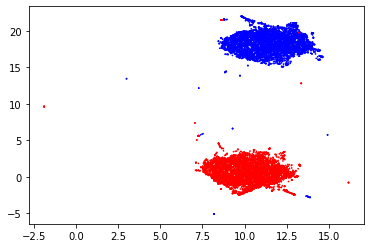

In [15]:
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c= np.where(y_train['0'].values == 1, 'red', 'blue'), s=0.5);